<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machiine_Learning_Models/blob/main/ARIMA_and_SARIMA_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# DATES TO ADD IN DATAFRAME
datelist = pd.date_range(start="2021-09-11",end="2022-03-02").to_pydatetime().tolist()

In [ ]:
file_name = 'ml_test.csv'
df = pd.read_csv(file_name)
df['Date'] = datelist 
df.head(4)    

,Category 1,Category 2,Service Level %,ABN %,Calls Abn,ASA (secs),Seat at Peak,Occupancy %,on_goal_sl,lr_binary,Date
0,Cat 2,Cat 2.4,0.455362,0.048072,91,91,80,0.899547,no_goal,0,2021-09-11
1,Cat 2,Cat 2.3,0.981096,0.010397,11,5,71,0.581073,yes_goal,1,2021-09-12
2,Cat 3,Cat 2.5,0.076168,0.127185,713,299,190,0.955376,no_goal,0,2021-09-13
3,Cat 3,Cat 2.1,0.836756,0.009754,38,19,209,0.847663,yes_goal,1,2021-09-14


# **ARIMA MODEL**

In [ ]:
train = pd.Series(df.drop(df.index[125:172])[df.columns[6]].values)
train.index = df.drop(df.index[125:172])['Date'].values

test = df.drop(df.index[0:125])['Date'].values
obs = df.drop(df.index[0:125])[df.columns[6]].values


predictions = list()
history = [x for x in train]

for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit().forecast()
  predictions.append(model_fit[0])
  history.append(model_fit[0])


In [ ]:
rmse = mean_absolute_error(obs, predictions)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 110.554


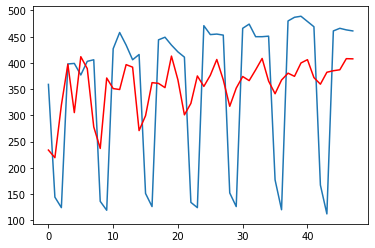

In [ ]:
pyplot.plot(obs)
pyplot.plot(predictions, color='red')
pyplot.show()

# **SARIMA MODEL**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from numpy import NaN

In [ ]:
best_model = SARIMAX(df.drop(df.index[125:172])[df.columns[6]],
                     order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


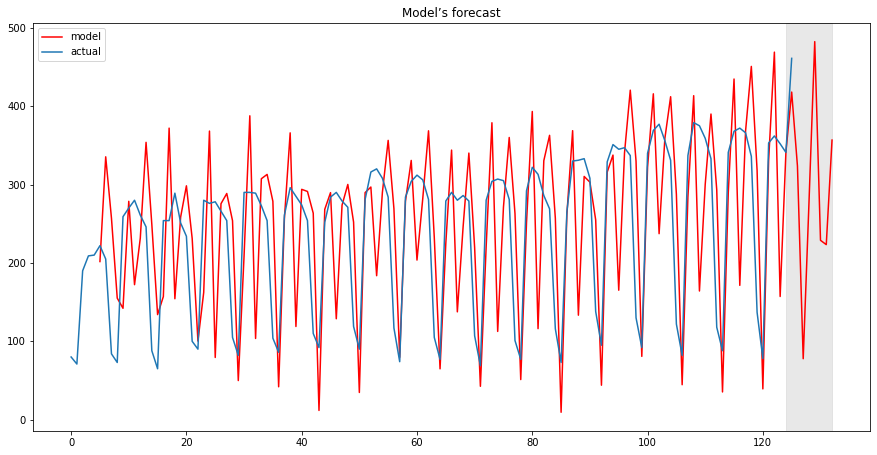

In [142]:
data = best_model.fittedvalues
data[:4+1] = NaN
#forecast = best_model.predict(start=8, end=data.shape[0]+8)
data.drop(data.tail(1).index,inplace=True)

forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data.append(forecast)

forecast.drop(forecast.tail(1).index,inplace=True)        # delete last 1 rows


pyplot.figure(figsize=(15, 7.5))
pyplot.title('Model’s forecast')
pyplot.plot(forecast, color='r', label='model')
pyplot.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
pyplot.plot(train.values, label='actual')       
pyplot.legend()
pyplot.show()

In [144]:
forecast = best_model.predict(125,172)
rmse = mean_absolute_error(obs, forecast.values)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 166.681


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


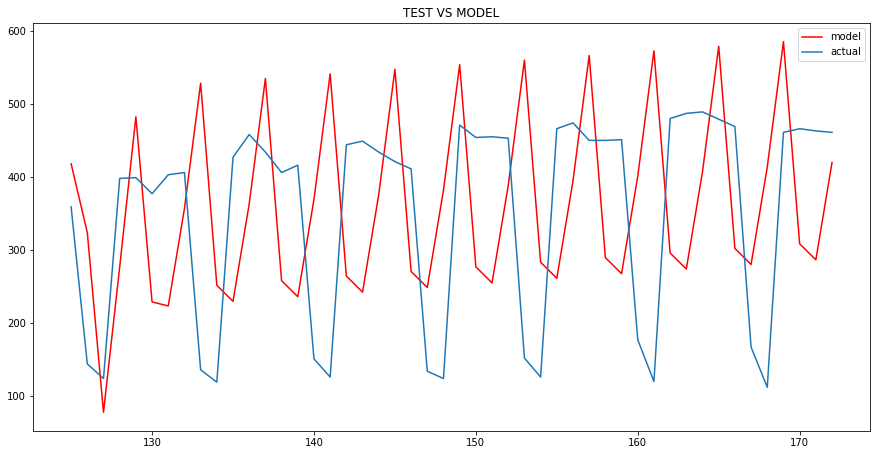

In [145]:
pyplot.figure(figsize=(15, 7.5))
pyplot.title('TEST VS MODEL')
pyplot.plot(forecast, color='r', label='model')
pyplot.plot(forecast.index,obs, label='actual')       
pyplot.legend()
pyplot.show()